In [123]:
#데이터 탐색 
#EDA (탐색적 데이터 분석)

In [124]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [125]:
path = './data/titanic.csv'

pd.read_csv(path)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [126]:
raw =pd.read_csv(path)
df = raw.copy()


In [127]:
df.shape

#891 데이터 존재, 12개 속성

(891, 12)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [130]:
#변수 타입 변환 

df['Survived'] = df['Survived'].astype('str')
df['Pclass'] = df['Pclass'].astype('str')


In [131]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [132]:
#groupby(), size()
#size() : 범주형데이터만 가능
group_pclass = df.groupby('Pclass') #좌석등급별 
group_pclass.size()

Pclass
1    216
2    184
3    491
dtype: int64

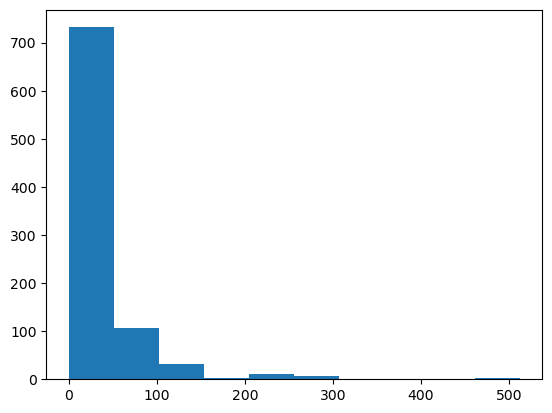

In [133]:
#히스토그램 

plt.hist(df['Fare'])
plt.show()

In [134]:
#데이터 분리 
df[df['Survived'] == '0']['Fare']

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

In [135]:
df[df['Survived'] == '0']['Pclass'].value_counts()


Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [136]:
df[df['Survived'] == '1']['Fare']


1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

In [137]:
df[df['Survived'] == '1']['Pclass'].value_counts()


Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [138]:
data_0 = df[df['Survived'] == '0']['Fare'] #사망자 요금 데이터
data_1 = df[df['Survived'] == '1']['Fare'] #생존자 요금 데이터 


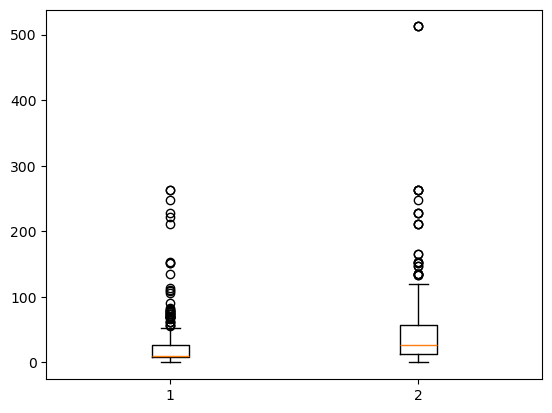

In [139]:
#이상치, 결측치 확인 

#boxplot 

fig, ax = plt.subplots()
ax.boxplot([data_0,data_1])
plt.show()

In [140]:
#빈도수 계산 

group_sex = df.groupby('Sex')
group_sex.size()

Sex
female    314
male      577
dtype: int64

In [141]:
#성별 (sex) 생존자 수 

df[df['Sex'] == 'female'][:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [142]:
data_female = df[df['Sex'] == 'female']['Survived'] #여성 생존자 데이터 
data_male = df[df['Sex'] == 'male']['Survived'] #남성 생존자 데이터 


In [143]:
pd.DataFrame(data_female).groupby('Survived').size()

Survived
0     81
1    233
dtype: int64

In [144]:
pd.DataFrame(data_male).groupby('Survived').size()


Survived
0    468
1    109
dtype: int64

In [145]:
#데이터 변환 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [146]:
#한국인, 일본인 각 성인 100명 육류 소비량 데이터 생성 

np.random.randn(1000) # 표준정규분포 데이터 1000개 생성 

meat_consum_kor = 5 * np.random.randn(1000) + 54
meat_consum_jpn = 4 * np.random.randn(1000) + 32


In [147]:
#데이터 프레임 생성 
pd.DataFrame({'한국인' : meat_consum_kor,
            	'일본인' : meat_consum_jpn})

,한국인,일본인
0,52.528260,28.729619
1,45.578007,30.142145
2,52.561319,32.486675
3,46.781746,37.392256
4,60.528245,30.142779
...,...,...
995,56.285446,31.236374
996,53.045540,33.586519
997,56.428232,27.115907
998,42.595160,36.445197


In [148]:
raw = pd.DataFrame({'한국인' : meat_consum_kor,
            	      '일본인' : meat_consum_jpn})

df = raw.copy()

In [149]:
df.head(3)

,한국인,일본인
0,52.528260,28.729619
1,45.578007,30.142145
2,52.561319,32.486675


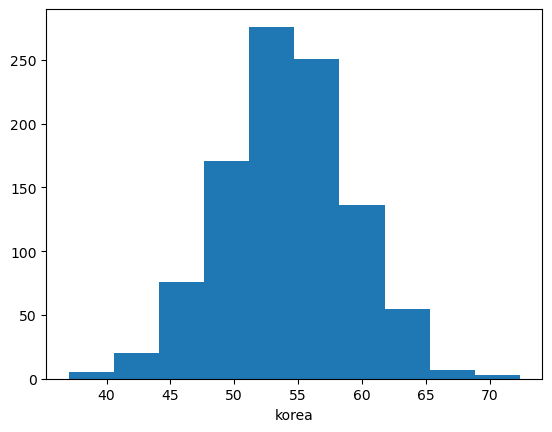

In [150]:
#한국인 육류 소비량 히스토그램 

plt.hist(meat_consum_kor)
plt.xlabel('korea')
plt.show()

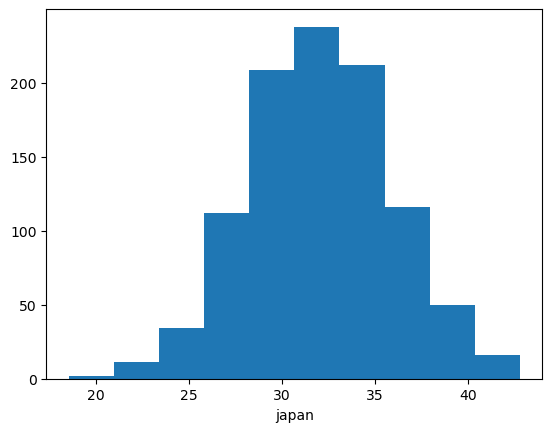

In [151]:
plt.hist(meat_consum_jpn)
plt.xlabel('japan')
plt.show()

In [152]:
#표준 졍규화 함수 zscore() 함수  X-평균 / 표준편차
#기존 데이터프레임 데이터에 새 열 생성 (zscore 데이터 표준화 한 컬럼 추가 )

import scipy.stats as ss 

df['한국인 표준화'] = ss.zscore(meat_consum_kor)
df['일본인 표준화'] = ss.zscore(meat_consum_jpn)


In [153]:
df.head()

,한국인,일본인,한국인 표준화,일본인 표준화
0,52.528260,28.729619,-0.309285,-0.865495
1,45.578007,30.142145,-1.696176,-0.495680
2,52.561319,32.486675,-0.302688,0.118144
3,46.781746,37.392256,-1.455975,1.402480
4,60.528245,30.142779,1.287075,-0.495514


In [154]:
#표준정규화 수식 활용 
# (x-x_bar) / sigma >> zscore


df['한국인표준화_수식'] = (meat_consum_kor - np.mean(meat_consum_kor)) / np.std(meat_consum_kor)

df['일본인표준화_수식'] = (meat_consum_jpn - np.mean(meat_consum_jpn)) / np.std(meat_consum_jpn)


In [155]:
df.head(3)

,한국인,일본인,한국인 표준화,일본인 표준화,한국인표준화_수식,일본인표준화_수식
0,52.528260,28.729619,-0.309285,-0.865495,-0.309285,-0.865495
1,45.578007,30.142145,-1.696176,-0.495680,-1.696176,-0.495680
2,52.561319,32.486675,-0.302688,0.118144,-0.302688,0.118144


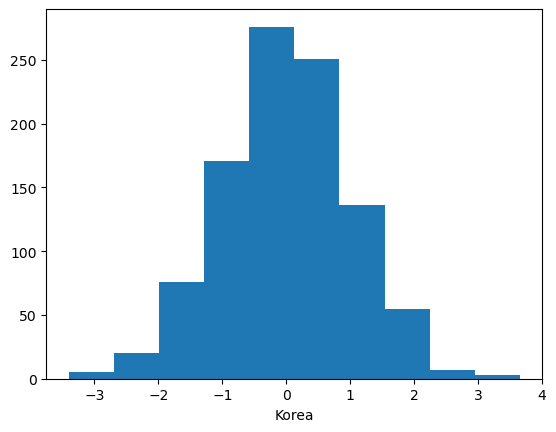

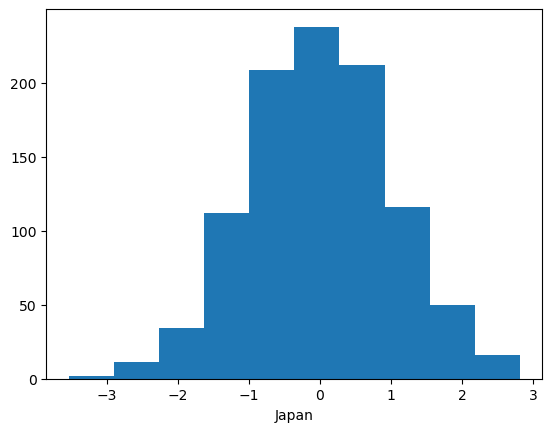

In [156]:
#표준화된 데이터에 대한 히스토그램 그리기 

plt.hist(df['한국인 표준화'])
plt.xlabel('Korea')
plt.show()

plt.hist(df['일본인 표준화'])
plt.xlabel('Japan')
plt.show()

In [157]:
#사이킷런 스케일러 활용 정규화(***암기)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['한국인 표준화_사이킷런'] = scaler.fit_transform(df[['한국인']])
df['일본인 표준화_사이킷런'] = scaler.fit_transform(df[['일본인']])


In [158]:
df.head()

,한국인,일본인,한국인 표준화,일본인 표준화,한국인표준화_수식,일본인표준화_수식,한국인 표준화_사이킷런,일본인 표준화_사이킷런
0,52.528260,28.729619,-0.309285,-0.865495,-0.309285,-0.865495,-0.309285,-0.865495
1,45.578007,30.142145,-1.696176,-0.495680,-1.696176,-0.495680,-1.696176,-0.495680
2,52.561319,32.486675,-0.302688,0.118144,-0.302688,0.118144,-0.302688,0.118144
3,46.781746,37.392256,-1.455975,1.402480,-1.455975,1.402480,-1.455975,1.402480
4,60.528245,30.142779,1.287075,-0.495514,1.287075,-0.495514,1.287075,-0.495514


In [159]:
#타입 : 시리즈 / 1차원 (배열형태)
df['한국인'] , type(df['한국인']) ,df['한국인'].shape

(0      52.528260
 1      45.578007
 2      52.561319
 3      46.781746
 4      60.528245
          ...    
 995    56.285446
 996    53.045540
 997    56.428232
 998    42.595160
 999    51.816807
 Name: 한국인, Length: 1000, dtype: float64,
 pandas.core.series.Series,
 (1000,))

In [160]:
#데이터프레임 (행열구조) / 2차원 

df[['한국인']] , type(df[['한국인']]) ,df[['한국인']].shape


(           한국인
 0    52.528260
 1    45.578007
 2    52.561319
 3    46.781746
 4    60.528245
 ..         ...
 995  56.285446
 996  53.045540
 997  56.428232
 998  42.595160
 999  51.816807
 
 [1000 rows x 1 columns],
 pandas.core.frame.DataFrame,
 (1000, 1))

In [161]:
#min-max (min:0, max: 1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['한국인 정규화_사이킷런_최소최대'] = scaler.fit_transform(df[['한국인']])
df['일본인 정규화_사이킷런_최소최대'] = scaler.fit_transform(df[['일본인']])


In [162]:
df.head(3)

,한국인,일본인,한국인 표준화,일본인 표준화,한국인표준화_수식,일본인표준화_수식,한국인 표준화_사이킷런,일본인 표준화_사이킷런,한국인 정규화_사이킷런_최소최대,일본인 정규화_사이킷런_최소최대
0,52.528260,28.729619,-0.309285,-0.865495,-0.309285,-0.865495,-0.309285,-0.865495,0.438270,0.420475
1,45.578007,30.142145,-1.696176,-0.495680,-1.696176,-0.495680,-1.696176,-0.495680,0.241517,0.478784
2,52.561319,32.486675,-0.302688,0.118144,-0.302688,0.118144,-0.302688,0.118144,0.439206,0.575566


In [163]:
#min-max 변환 수식 이용
# (x - min) / (max-min)

min = np.min(meat_consum_kor)
max = np.max(meat_consum_kor)

df['한국인_수식_최대최소'] = (df[['한국인']] - min) / (max - min)

min = np.min(meat_consum_jpn)
max = np.max(meat_consum_jpn)

df['일본인_수식_최대최소'] = (df[['일본인']] - min) / (max - min)


In [164]:
df.head()

,한국인,일본인,한국인 표준화,일본인 표준화,한국인표준화_수식,일본인표준화_수식,한국인 표준화_사이킷런,일본인 표준화_사이킷런,한국인 정규화_사이킷런_최소최대,일본인 정규화_사이킷런_최소최대,한국인_수식_최대최소,일본인_수식_최대최소
0,52.528260,28.729619,-0.309285,-0.865495,-0.309285,-0.865495,-0.309285,-0.865495,0.438270,0.420475,0.438270,0.420475
1,45.578007,30.142145,-1.696176,-0.495680,-1.696176,-0.495680,-1.696176,-0.495680,0.241517,0.478784,0.241517,0.478784
2,52.561319,32.486675,-0.302688,0.118144,-0.302688,0.118144,-0.302688,0.118144,0.439206,0.575566,0.439206,0.575566
3,46.781746,37.392256,-1.455975,1.402480,-1.455975,1.402480,-1.455975,1.402480,0.275593,0.778069,0.275593,0.778069
4,60.528245,30.142779,1.287075,-0.495514,1.287075,-0.495514,1.287075,-0.495514,0.664740,0.478810,0.664740,0.478810


In [165]:
#USJudgeRating.csv 

path = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv"



In [166]:
df = pd.read_csv(path)

In [167]:
df.head(3)

,rownames,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8


In [168]:
import scipy.stats as ss 

#지정한 컬럼 왜도(skew) 계산 

print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))


1.0859724796276253
-1.5582154642293153


In [169]:
df['PHYS'][:10]



0    8.3
1    8.5
2    7.9
3    8.8
4    5.5
5    8.6
6    9.1
7    6.8
8    8.8
9    8.5
Name: PHYS, dtype: float64

In [170]:
(df['PHYS'] + 1)[:10]

0     9.3
1     9.5
2     8.9
3     9.8
4     6.5
5     9.6
6    10.1
7     7.8
8     9.8
9     9.5
Name: PHYS, dtype: float64

In [171]:
np.max(df['PHYS'] + 1)

10.1

In [172]:
np.max(df['PHYS'] + 1) - df['PHYS']
#원래 값이 클수록 결과 값이 작아지고, 원래 값이 작으면 결과 값은 커지는 효과

0     1.8
1     1.6
2     2.2
3     1.3
4     4.6
5     1.5
6     1.0
7     3.3
8     1.3
9     1.6
10    1.7
11    3.2
12    2.0
13    3.9
14    1.7
15    2.1
16    3.2
17    2.0
18    2.1
19    2.9
20    2.6
21    2.7
22    5.4
23    2.3
24    1.4
25    1.1
26    1.8
27    1.3
28    1.7
29    1.2
30    1.7
31    2.0
32    1.4
33    1.3
34    3.8
35    2.1
36    2.0
37    1.6
38    2.1
39    2.0
40    2.5
41    1.8
42    2.3
Name: PHYS, dtype: float64

In [173]:
np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

0     0.587787
1     0.470004
2     0.788457
3     0.262364
4     1.526056
5     0.405465
6     0.000000
7     1.193922
8     0.262364
9     0.470004
10    0.530628
11    1.163151
12    0.693147
13    1.360977
14    0.530628
15    0.741937
16    1.163151
17    0.693147
18    0.741937
19    1.064711
20    0.955511
21    0.993252
22    1.686399
23    0.832909
24    0.336472
25    0.095310
26    0.587787
27    0.262364
28    0.530628
29    0.182322
30    0.530628
31    0.693147
32    0.336472
33    0.262364
34    1.335001
35    0.741937
36    0.693147
37    0.470004
38    0.741937
39    0.693147
40    0.916291
41    0.587787
42    0.832909
Name: PHYS, dtype: float64

In [174]:
#변수변환 - 로그 변환 
df['CONT_log'] = np.log(df['CONT'])
df['PHYS_log'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])


print(df['CONT_log'])
print(df['PHYS_log'])

0     1.740466
1     1.916923
2     1.974081
3     1.916923
4     1.987874
5     1.824549
6     2.360854
7     1.945910
8     1.987874
9     2.104134
10    1.945910
11    1.871802
12    1.902108
13    1.945910
14    1.871802
15    1.987874
16    2.079442
17    2.041220
18    2.116256
19    2.261763
20    1.960095
21    2.028148
22    1.887070
23    1.824549
24    2.014903
25    2.054124
26    1.960095
27    2.014903
28    2.014903
29    1.960095
30    1.887070
31    2.128232
32    1.931521
33    1.987874
34    2.041220
35    2.140066
36    1.931521
37    1.871802
38    2.116256
39    2.116256
40    2.197225
41    1.960095
42    2.151762
Name: CONT_log, dtype: float64
0     0.587787
1     0.470004
2     0.788457
3     0.262364
4     1.526056
5     0.405465
6     0.000000
7     1.193922
8     0.262364
9     0.470004
10    0.530628
11    1.163151
12    0.693147
13    1.360977
14    0.530628
15    0.741937
16    1.163151
17    0.693147
18    0.741937
19    1.064711
20    0.955511
21    0.9

In [175]:
import scipy.stats as ss 

#지정한 컬럼 왜도(skew) 계산 

print(ss.skew(df['CONT_log']))
print(ss.skew(df['PHYS_log']))

0.6555571886692603
0.5824357748750443


In [176]:
#수학점수 
data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65], ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]


df = pd.DataFrame(data, columns=['이름','수학점수'])
df
np.mean(df['수학점수'])

73.5

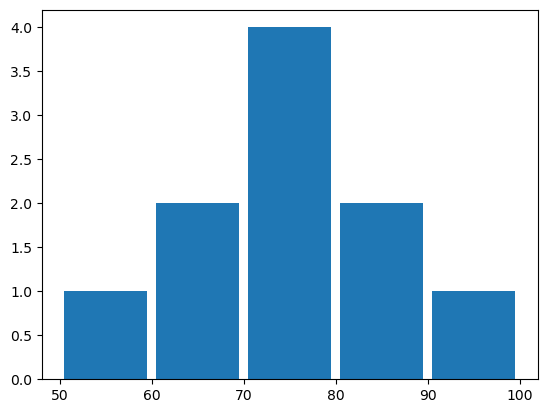

In [177]:
# 히스토그램 (범위 50~100, 5개 구간)
plt.hist(df['수학점수'], bins=5, range=[50,100], rwidth=0.9) #rwidth(그래프 폭 조절하는 기능, 생략시 1)
plt.show()

In [178]:
#조건을 사용해서 구간을 직접 지정 

df['등급'] = 0 #등급컬럼 생성 
df.head()

,이름,수학점수,등급
0,철수,52,0
1,영희,92,0
2,미영,84,0
3,시완,71,0
4,미경,65,0


In [179]:
df.loc[df['수학점수'] < 60, '등급'] = 'F'
df.loc[(df['수학점수'] >= 60) & (df['수학점수'] < 70), '등급'] = 'D'
df.loc[(df['수학점수'] >= 70) & (df['수학점수'] < 80), '등급'] = "C"
df.loc[(df['수학점수'] >= 80) & (df['수학점수'] < 90), '등급'] = "B"
df.loc[(df['수학점수'] >= 90) & (df['수학점수'] <= 100), '등급'] = "A"

C:\Users\Master\AppData\Local\Temp\ipykernel_16040\2586144994.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['수학점수'] < 60, '등급'] = 'F'


In [180]:
df.head()

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D


In [181]:
df['등급_CUT'] = pd.cut(x=df['수학점수'],
                    bins=[0,60,70,80,90,100],
                    labels=['F','D','C','B','A'],
                    include_lowest=True)

In [182]:
df.head()


,이름,수학점수,등급,등급_CUT
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D


In [183]:
df['등급_QCUT'] = pd.qcut(x=df['수학점수'], 
                          q=5, 
                          labels=['F','D','C','B','A'])

In [184]:
df.head()


,이름,수학점수,등급,등급_CUT,등급_QCUT
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F


차원축소 : PCA(Principal Component Analysis, 주성분분석)


In [185]:
pd.read_csv('./data/iris.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [186]:
raw = pd.read_csv('./data/iris.csv')
iris = raw.copy()

In [196]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [198]:
#연속형 변수와 범주형 변수 분리 

df = iris.drop(['species'], axis=1)
df_species = iris[['species']]

In [199]:
df_species


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [202]:
#변수 정규화 
#StandardScaler : 평균 0, 분산(표준편차) 1 >> 정규분포 

from sklearn.preprocessing import StandardScaler

df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])

df['petal_length'] = StandardScaler().fit_transform(df[['petal_length']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])

In [203]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [205]:
#PCA 수행 
from sklearn.decomposition import PCA

pca = PCA(n_components= 4 )

p_score = pca.fit_transform(df)
p_score

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

In [207]:
pca.explained_variance_ratio_

#주요인 pca1, pca2
#pca1은 가장 주요한 요인으로 전체 데이터의 72.96%설명함
#pca2는 두번째 주요인으로 전체 데이터의 22.85% 설명

#주요인 pca1, pca2로 설명한 데이터는 95.81%
#0.72962445 + 0.22850762 = 0.95813207

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [209]:
#pca 수행 
from sklearn.decomposition import PCA

pca_2 = PCA(n_components= 2)

p_score_2 = pca_2.fit_transform(df)
print(p_score_2)
print(p_score_2.shape)
print(pca_2.explained_variance_ratio_)


[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

결측치 처리

In [210]:
pd.read_csv('./data/titanic.csv')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [212]:
raw = pd.read_csv('./data/titanic.csv')
df = raw.copy()

In [213]:
#null값 유무 확인 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [215]:
#결측치가 있는 모든 행 제거 
print(df.dropna(axis=0))

df_row = df.dropna(axis=0)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [216]:
df_row.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [217]:
df_row.isna().sum().sum()


0

In [218]:
df_row.shape

(183, 12)

In [219]:
#단순 대치 : 평균
df['Age'].isna().sum()

177

In [220]:
age_mean = df['Age'].mean()
age_mean

29.69911764705882

In [221]:
df['Age'].fillna(age_mean, inplace=True)

In [222]:
df['Age'].isnull().sum()

0

In [228]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [223]:
#단순대치법 : 최빈값 대체 

from scipy.stats import mode 

df['Embarked'].isna().sum()

2

In [225]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [226]:
embarked_mode = df['Embarked'].mode()


In [227]:
embarked_mode[0]

'S'

In [229]:
df['Embarked'].fillna(method='ffill', inplace=True)

C:\Users\Master\AppData\Local\Temp\ipykernel_16040\2170384249.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'].fillna(method='ffill', inplace=True)


In [230]:
# df['Embarked']의 결측치를 '최빈값' 대체 

# df['Embarked'].fillna(embarked_mode[0], inplace=True)
df['Embarked'].isnull().sum()

0

In [231]:
#성별 평균연령 구하기 
df.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [232]:
# 좌석등급별 평균연령 구하기 
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [233]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)
# transform('mean') : 
# 그룹별로 계산된 값을 원래 데이터프레임의 index와 동일한 크기로 반환 

In [234]:
df[['Pclass', 'Age']]


,Pclass,Age
0,3,22.000000
1,1,38.000000
2,3,26.000000
3,1,35.000000
4,3,35.000000
...,...,...
886,2,27.000000
887,1,19.000000
888,3,29.699118
889,1,26.000000


이상치 처리 

In [251]:
#정규분포 
#평균 50, 표준편차(std) 10인 데이터 200개 생성 

data = 10 * np.random.randn(200) + 50
data[:10]

array([56.13808535, 56.60556284, 39.74646677, 37.5445223 , 58.57880764,
       67.55331963, 47.56838135, 43.19079139, 62.65863733, 64.37655143])

In [252]:
pd.DataFrame({"값": data})


,값
0,56.138085
1,56.605563
2,39.746467
3,37.544522
4,58.578808
...,...
195,38.253257
196,53.326843
197,40.423573
198,57.751094


In [253]:
df = pd.DataFrame({"값": data})

# 임의의 이상치 삽입 
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

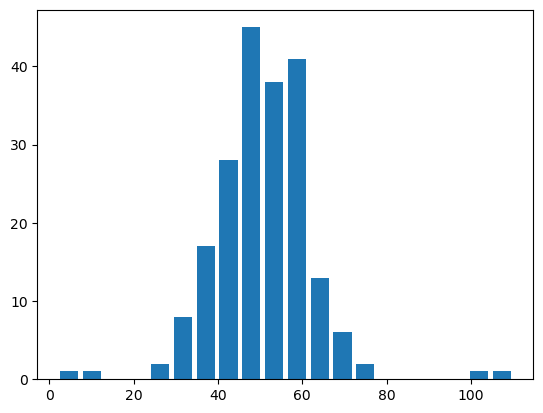

In [254]:
# 분포 시각화 
plt.hist(df['값'], bins=20, rwidth=0.8) 
plt.show()

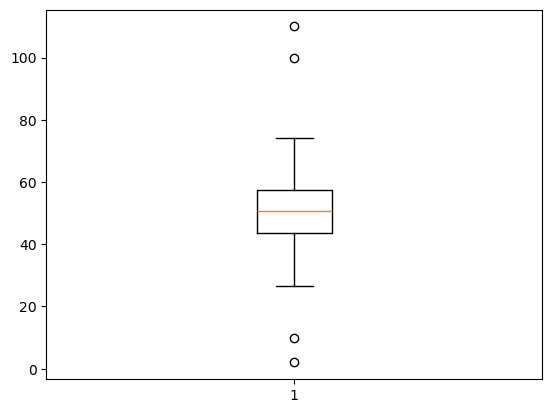

In [255]:
plt.boxplot(df['값'])
plt.show()

In [256]:
Q1 = df['값'].quantile(.25)
Q2 = df['값'].quantile(.50)
Q3 = df['값'].quantile(.75)

IQR = Q3 - Q1

print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print('IQR = ', IQR)

Q1 =  43.75931338326344
Q2 =  50.60115318586023
Q3 =  57.28282983205115
IQR =  13.52351644878771


In [257]:
df.describe()


,값
count,204.000000
mean,50.697350
std,11.544813
min,2.000000
25%,43.759313
50%,50.601153
75%,57.282830
max,110.000000


In [258]:
df_desc = df.describe()
df_desc.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [259]:
df_desc.loc['25%', :]

값    43.759313
Name: 25%, dtype: float64

In [261]:
Q1 = df['값'].describe()["25%"]
Q2 = df['값'].describe()["50%"]
Q3 = df['값'].describe()["75%"]

IQR = Q3 - Q1

print("Q1 = ", Q1)
print("Q2 = ", Q2)

print("Q3 = ", Q3)
print('IQR = ', IQR)

Q1 =  43.75931338326344
Q2 =  50.60115318586023
Q3 =  57.28282983205115
IQR =  13.52351644878771


In [263]:
condition = df['값'] > (Q3 + IQR * 1.5)
df[condition]
upper_outlier = df[condition]
upper_outlier

,값
202,100.0
204,110.0


In [264]:
condition = df['값'] < (Q1 - IQR * 1.5)
df[condition]
lower_outlier = df[condition]
print(lower_outlier)

        값
201   2.0
203  10.0


평활화(Smoothing)

In [265]:
# 평활하는 데이터 분포를 매끄럽게 만들어 줘서 
# 데이터에서 중요하지 않은 것(잡음 등)을 제거 >> 패턴 분석 방법
# 이동평균(MA: Moving Average)

In [266]:
path = './data/lynx.csv'


In [267]:
pd.read_csv(path)


,Unnamed: 0,time,value
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475
...,...,...,...
109,110,1930,662
110,111,1931,1000
111,112,1932,1590
112,113,1933,2657


In [268]:
raw  = pd.read_csv(path)
df = raw.copy()

In [269]:
df.describe()

,Unnamed: 0,time,value
count,114.000000,114.000000,114.000000
mean,57.500000,1877.500000,1538.017544
std,33.052988,33.052988,1585.843914
min,1.000000,1821.000000,39.000000
25%,29.250000,1849.250000,348.250000
50%,57.500000,1877.500000,771.000000
75%,85.750000,1905.750000,2566.750000
max,114.000000,1934.000000,6991.000000


In [270]:
#단순 이동평균 (10년)
df['value'][:10]

0     269
1     321
2     585
3     871
4    1475
5    2821
6    3928
7    5943
8    4950
9    2577
Name: value, dtype: int64

In [271]:
df['value'].rolling(10).mean()[:10]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9    2374.0
Name: value, dtype: float64

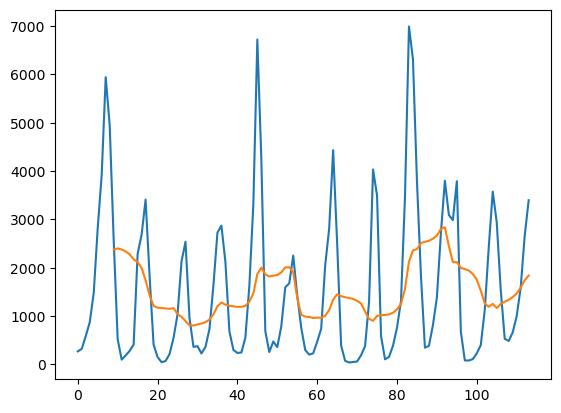

In [273]:
df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])
plt.show()



In [274]:
# 지수 가중 이동평균 (10년) 

df['value'].ewm(10).mean()

0       269.000000
1       296.238095
2       401.797583
3       536.360914
4       761.461483
          ...     
109    1487.443285
110    1443.129132
111    1456.481338
112    1565.621692
113    1732.022900
Name: value, Length: 114, dtype: float64

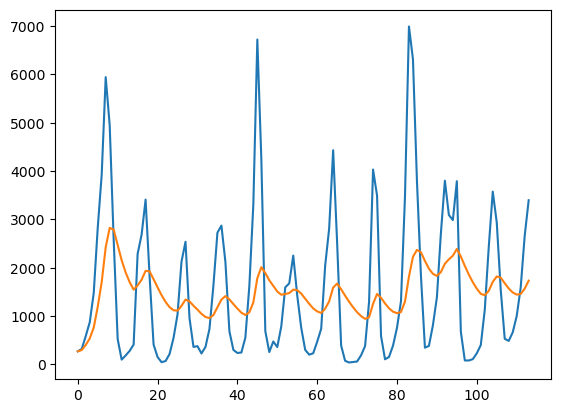

In [275]:
df['ewm'] = df['value'].ewm(10).mean()

plt.plot(df['value'])
plt.plot(df['ewm'])

plt.show()